In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/Testing Offsets/200k_0.2x2_misal_df.csv", index_col=0)
df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PZ_TRUTH,PHI_TRUTH,THETA_TRUTH,...,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_5,GLOBAL_Z_HIT_6,RES_Y_HIT_1,RES_Y_HIT_2,RES_Y_HIT_3,RES_Y_HIT_4,RES_Y_HIT_5,RES_Y_HIT_6
0,-0.003472,0.000434,1.568073,288.044210,0.784428,288.844513,-1.0,0.784745,0.000432,1.568079,...,-48.358624,-71.530060,-72.570541,-74.001945,-0.019834,0.209017,0.177383,0.038325,0.103362,163.474411
1,-0.000866,-0.000694,1.570833,1155.113584,-0.042049,1144.326660,-1.0,-0.053950,-0.000708,1.570843,...,5.005929,5.119396,5.209146,5.391609,-0.244699,0.202220,-0.002153,-0.044490,0.116836,-140.716965
2,-0.030195,-0.014826,1.565021,33.118036,0.191253,33.149776,-1.0,0.191329,-0.014826,1.565025,...,-11.000354,-60.188480,-62.988258,-65.804665,-0.152557,0.236743,4.457588,-0.203189,-0.123424,30.490164
3,-0.007118,-0.004912,1.564960,140.480819,0.819920,141.559982,-1.0,0.826991,-0.004897,1.564954,...,320.635071,270.427643,267.872559,264.862335,-0.176327,0.379333,0.567540,-0.193591,-0.117735,41.958054
4,-0.003916,0.004738,1.572947,255.345124,-0.549109,277.003693,-1.0,-0.593702,0.004748,1.572940,...,375.888275,NaN,NaN,NaN,-0.180225,0.138783,-44.944817,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,-0.002983,-0.003759,1.569191,335.192813,0.538061,334.468933,-1.0,0.537384,-0.003766,1.569190,...,75.830360,62.263073,61.646267,60.870171,-0.129858,-0.047228,-1.374886,-0.241802,0.012044,118.411133
4751,-0.092955,-0.009150,1.589207,10.757950,-0.198045,10.741720,-1.0,-0.197330,-0.009150,1.589168,...,-85.669640,70.855431,80.072945,89.210648,-0.072039,0.106098,31.461012,0.198922,0.064896,-141.338852
4752,-0.000474,0.001455,1.570468,2111.926073,0.694265,2184.153076,-1.0,0.724636,0.001457,1.570465,...,59.321232,56.328644,56.412617,56.408516,-0.341297,0.176498,-0.080679,-0.112836,0.078290,32.908424
4753,-0.000607,0.000424,1.571118,1648.535439,-0.530285,1694.237427,-1.0,-0.537749,0.000431,1.571114,...,-128.444885,-125.966599,-125.380569,-125.471458,-0.235957,0.194483,0.312352,-0.017294,-0.057383,188.068588


In [5]:
from scipy.stats import norm

def Residual_Plot(x, label = "", save = False, bins=100):
    """
    Residual_Plot takes a 1D input of data and plots it as a frequency density histogram, overlaying a fitted normal distribution.

    Inputs
    x: 1D input data, Pandas series or Numpy array
    label: adds labels to the x axis and file name if save is set to true, string
    save: if True will save the plot as label_residual_plot.png, boolean
    bins: number of bins for the histogram, integer

    Returns
    mu: the mean of the fitted normal distribution, float
    std: the standard deviation of the fitted normal distribution, float
    fig: the matplotlib figure containing the final graph, matplotlib figure
    """

    x = x[~np.isnan(x)]

    mu, std = norm.fit(x)

    norm_x = np.arange(start = np.min(x), stop = np.max(x), step = 0.0001)
    norm_y = norm.pdf(norm_x, mu, std)

    fig = plt.figure(figsize = (4, 4), dpi = 200)
    plt.hist(x, bins = bins, density = True)
    plt.plot(norm_x, norm_y)
    
    if label != "":
        plt.xlabel("Residual in " + label)

    plt.ylabel("Frequency Density")
    plt.text(x = -0.5, y = -1.2, s = "Mean : " + str(mu) + " mm" + "\nSigma : " + str(std) + " mm", size = 10)
    plt.show()

    if save == True:
        plt.savfig(label + "_residual_plot.png")

    return mu, std, fig



<Axes: >

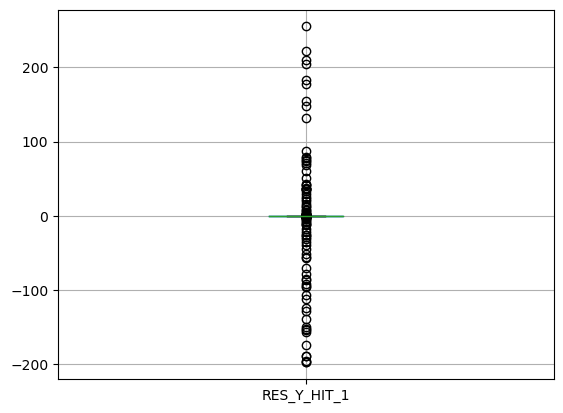

In [11]:
df.boxplot("RES_Y_HIT_1")

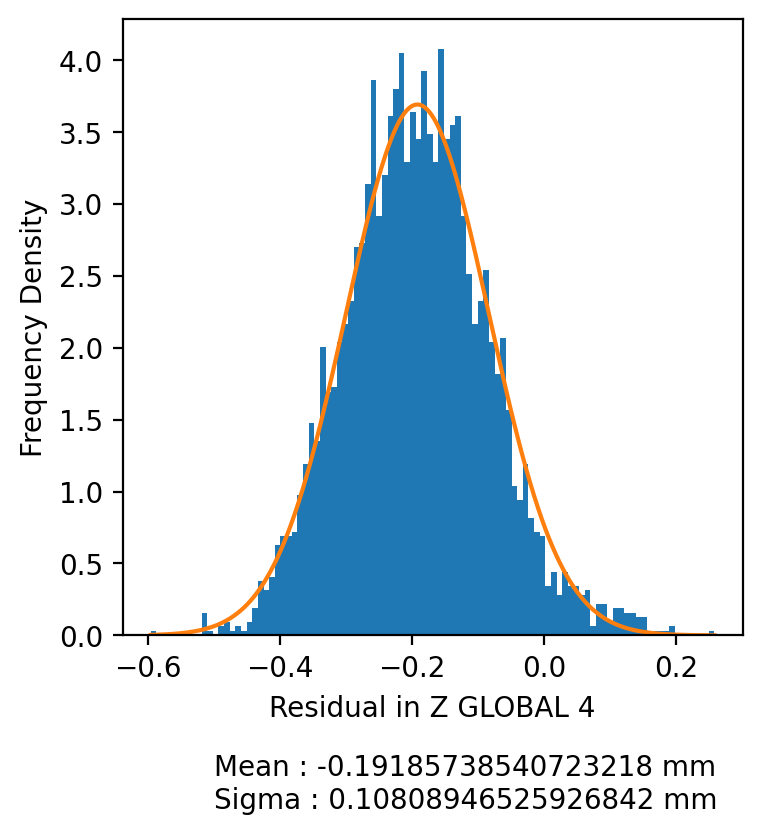

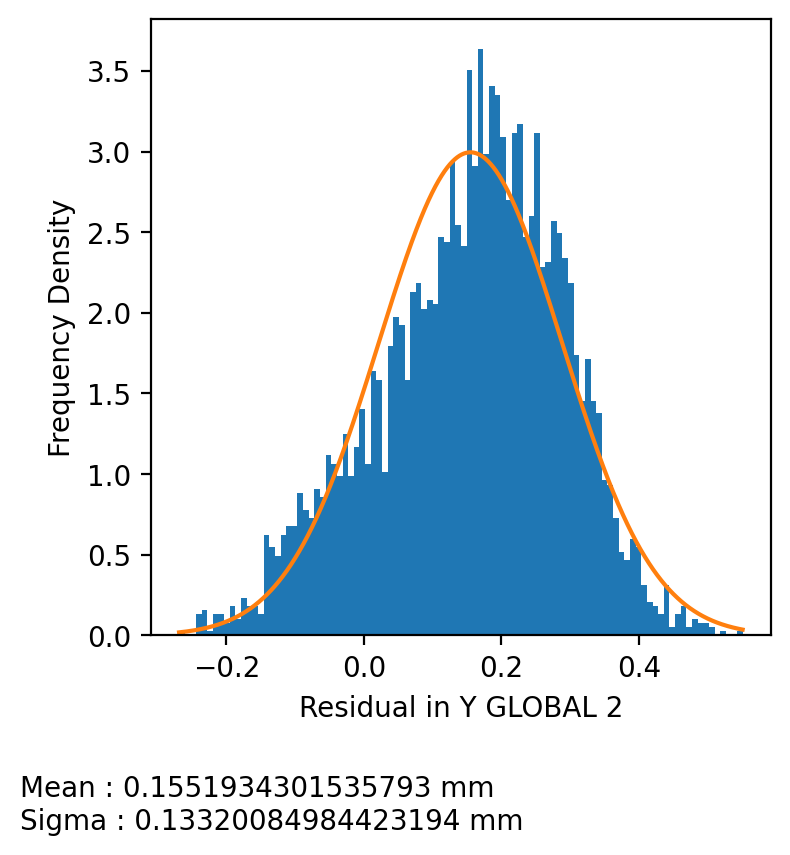

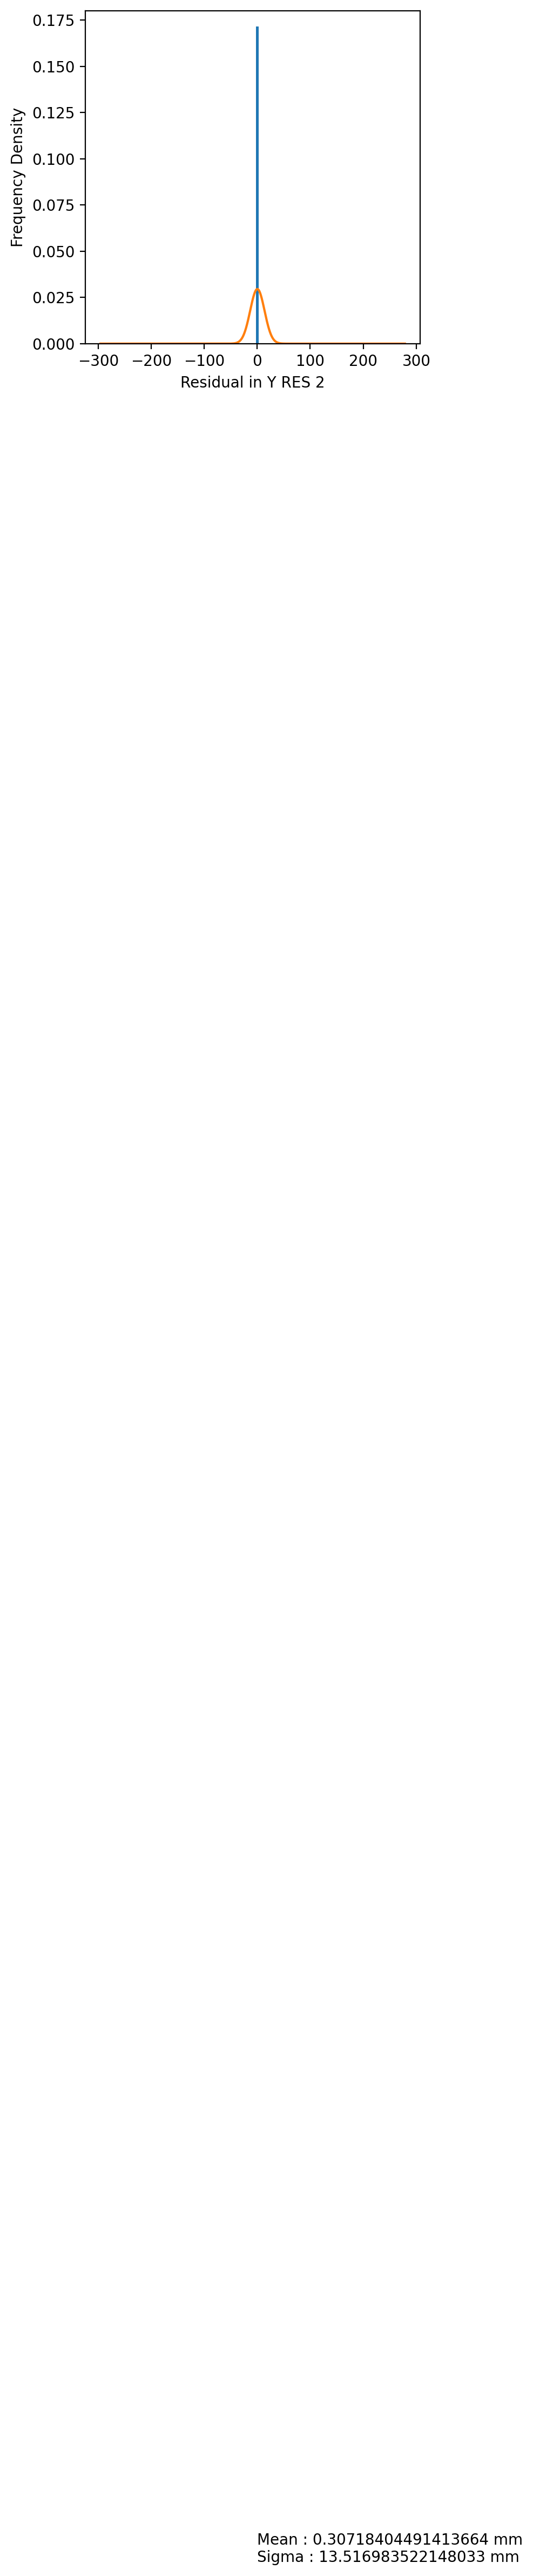

In [6]:
mu, std, fig = Residual_Plot(df["GLOBAL_Z_HIT_4"] - df["Z_TRUTH_4"], label = "Z GLOBAL 4")
mu, std, fig = Residual_Plot(df["GLOBAL_Y_HIT_2"] - df["Y_TRUTH_2"], label = "Y GLOBAL 2")
mu, std, fig = Residual_Plot(df["RES_Y_HIT_2"], label = "Y RES 2")

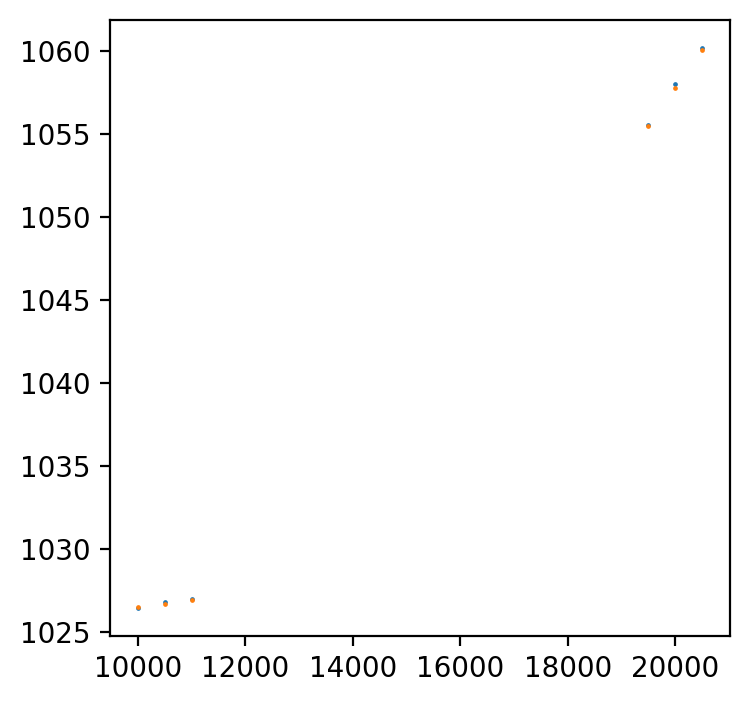

In [30]:
row = 0
plt.figure(figsize = (4, 4), dpi = 200)
for row in range(0, 1):
    plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                y = [df["GLOBAL_Y_HIT_1"][row], df["GLOBAL_Y_HIT_2"][row], df["GLOBAL_Y_HIT_3"][row], df["GLOBAL_Y_HIT_4"][row], df["GLOBAL_Y_HIT_5"][row], df["GLOBAL_Y_HIT_6"][row]],
                s = 0.5)
    
    plt.scatter(x = [df["X_TRUTH_1"][row], df["X_TRUTH_2"][row], df["X_TRUTH_3"][row], df["X_TRUTH_4"][row], df["X_TRUTH_5"][row], df["X_TRUTH_6"][row]],
                y = [df["Y_TRUTH_1"][row], df["Y_TRUTH_2"][row], df["Y_TRUTH_3"][row], df["Y_TRUTH_4"][row], df["Y_TRUTH_5"][row], df["Y_TRUTH_6"][row]],
                s = 0.5)
plt.show()